# 一、关联 （Correlation）

关联图表用于可视化2个或更多变量之间的关系。 也就是说，一个变量如何相对于另一个变化。

## 2.带边界的气泡图（Bubble plot with Encircling）

有时，您希望在边界内显示一组点以强调其重要性。 在这个例子中，你从数据框中获取记录，并用下面代码中描述的 encircle（） 来使边界显示出来。

####  导入所需要的库

In [2]:
# 导入numpy库
import numpy as np
# 导入pandas库
import pandas as pd
# 导入matplotlib库
import matplotlib as mpl
import matplotlib.pyplot as plt
# 导入seaborn库
import seaborn as sns
# 在jupyter notebook显示图像
%matplotlib inline

# 导入patches
from matplotlib import patches
# 导入ConvexHull（可创建凸包）
from scipy.spatial import ConvexHull

plt.style.use('seaborn-whitegrid')
sns.set_style("white")

#### 设定图像各种属性

In [3]:
large = 22; med = 16; small = 12
            # 设置子图上的标题字体
params = {'axes.titlesize': large,  
            # 设置图例的字体
          'legend.fontsize': med,
            # 设置图像的画布
          'figure.figsize': (16, 10),  
            # 设置标签的字体
          'axes.labelsize': med, 
            # 设置x轴上的标尺的字体
          'xtick.labelsize': med,  
            # 设置整个画布的标题字体
          'ytick.labelsize': med,  
          'figure.titlesize': large}  
# 更新默认属性
plt.rcParams.update(params)  
 # 设定整体风格
plt.style.use('seaborn-whitegrid')
# 设定整体背景风格
sns.set_style("white")  

#### 测试版本

In [4]:
print(mpl.__version__)
print(sns.__version__)

3.1.0
0.9.0


#### 程序代码

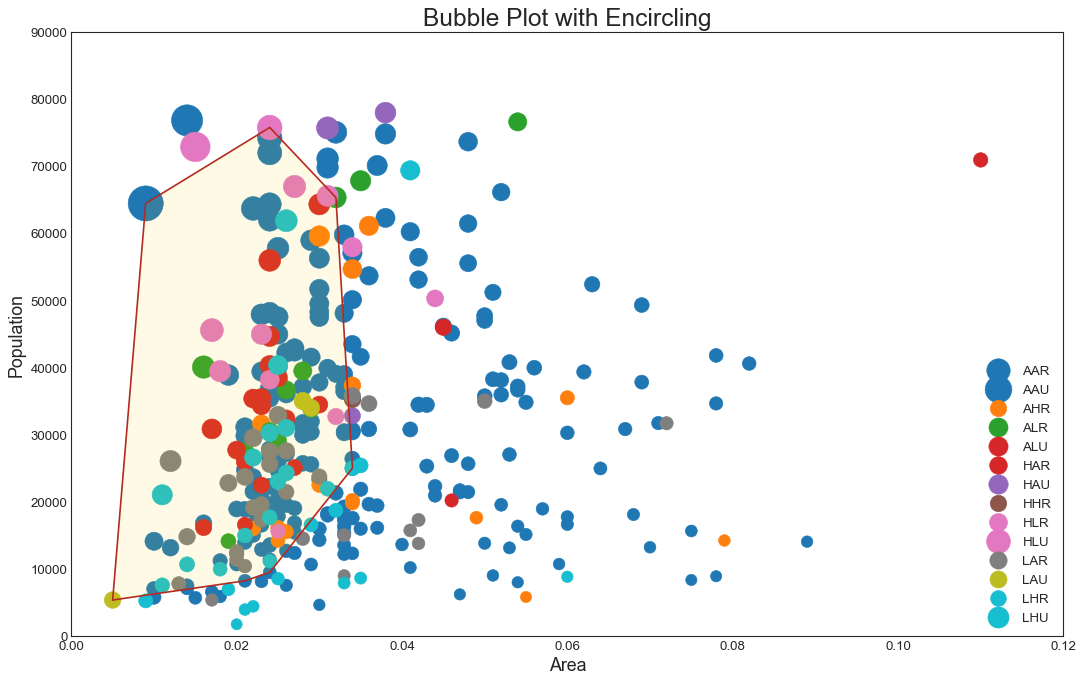

In [39]:
# step1:导入数据
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
# 准备数据以及颜色
categories = np.unique(midwest["category"])   # 使用np.umique对midwest["category"]去重
    # 使用列表推导式，建立colors列表
    # 14个数据，0-13
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]

# step2:为每个类别绘制具有独特颜色的散点图
    # 建立画布
plt.figure(figsize=(16, 10),  # 绘图尺寸默认为（6.4, 4.8）
           dpi = 80,          # 图像分辨效率，默认dpi为100
          facecolor =  "w",   # 背景颜色，默认为白色
          edgecolor = 'k')    # 边框颜色，默认为白色
 
    # 绘图
         # 使用函数enumerate：将可遍历的数据对象组合为一个索引序列，同时列出数据和数据索引
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',                                # 横纵坐标
                data=midwest.loc[midwest.category==category, :]    # 横纵坐标所对应的数据 
                , s="dot_size"                                     # 数据尺寸大小 
                , c= np.array(colors[i]).reshape(1,-1)
                , label=str(category)                              # 设定标签名称
                , edgecolors= np.array(colors[i]).reshape(1,-1)    # 标记的边缘颜色
                # , alpha = 0.7
                , linewidths=.5)                                   # 线宽               

# step3:Encircling
    
    # 定义绘制画环绕的函数
def encircle(x, y, ax=None, **kw):
        
    if not ax: ax = plt.gca()                         # 如果没有子图对象，那么就创建一个新的子图对象
    # np.c_中的c是column（列）的缩写，是按列叠加两个矩阵的意思，也可以说是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()。
    p = np.c_[x, y]
    hull = ConvexHull(p)                              # 将数据集输入到ConverHull中，自动生成凸包类型的对象(hull)
    ploy = plt.Polygon(p[hull.vertices, :], **kw)     # 利用plt.Polygon绘制多边形
    ax.add_patch(ploy)                                # 将多边形ploy修补到当前子图中 
    
    # 选择要包围的数据
midwest_encircle_data = midwest.loc[midwest.state == 'IN', :]

# step4:绘制顶点周围的多边形
    # 绘画线条
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
        ec = "firebrick",                # 线条颜色
        fc = 'none',
        linewidth = 1.5)                 # 线宽
    # 背景颜色
encircle(midwest_encircle_data.area, 
        midwest_encircle_data.poptotal,
        ec = 'none',                     # 线条颜色  
        fc = 'gold',
        alpha = 0.1)                     # 透明度

# step5:装饰
    
plt.gca().set(xlim = (0.0, 0.12),        # 设置x坐标轴的范围   
              ylim = (0, 90000),         # 设置y坐标轴的范围    
            xlabel = "Area",             # 设置x坐标的标题
            ylabel = "Population")       # 设置y坐标的标题 
    
plt.xticks(fontsize = 12)                # 设置x坐标的字体
plt.yticks(fontsize = 12)                # 设置y坐标的字体
plt.title("Bubble Plot with Encircling", fontsize=22)     # 设置图像标题和字体字体
plt.legend(fontsize = 12)                                 # 显示图例，设置图例大小
plt.show()

### 博文总结

#### np.unique
- 该函数是去除数组中的重复数字，并进行排序之后输出。

#### 列表推导式
- 列表推导式（又称列表解析式）提供了一种简明扼要的方法来创建列表。
- 它的结构是在一个中括号里包含一个表达式，然后是一个for语句，然后是 0 个或多个 for 或者 if 语句。那个表达式可以是任意的，意思是你可以在列 表中放入任意类型的对象。返回结果将是一个新的列表，在这个以 if 和 for 语句为上下文的表达式运行完成之后产生。
- 列表推导式的执行顺序：各语句之间是嵌套关系，左边第二个语句是最外层，依次往右进一层，左边第一条语句是最后一层。
- colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]

#### 创建画布

- plt.figure()
- 参数说明
    - figsize__画布尺寸
    - dpi__分辨率
    - facecolor__背景颜色，默认为白色
    - edgecolor__边框颜色，默认为白色

#### enumerate
- enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
- 可用[*]打开惰性数据

#### 绘制散点图
- plt.scatter()
- 参数说明
    - x__横坐标
    - y__纵坐标
    - s__数据尺寸大小
    - c__颜色
    - label__设置标签名称
    - edgecolor__标记的边缘颜色
    - alpha__透明度
    - linewidth__线宽

#### plt.gca
- plt.gca()获得当前的对象子图对象ax，如果没有子图对象，那一个么就创建新的子图对象

#### np.c__
- 按行连接两个矩阵，但要求行数相等